# TSM_AppElm Labo02 
## Simulation de la permittivité d'un matériau

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class findParam:
    def __init__(self, data,fres, offset=0.06):
        self.data = data
        self.fres = fres
        self.offset = offset

    def findMin(self):
        val = np.min(self.data[:,1])
        index = np.where(val == self.data[:,1])
        return np.squeeze(self.data[index])

    def findBP(self):
        tab = np.where(self.data[:,1] < -10)
        BPmin = self.data[tab[0][0]][0]
        BPmax = self.data[tab[0][len(tab[0])-1]][0]
        return BPmin, BPmax

    def findFreq(self,f):
        tab = np.where((self.data[:,0] < f+self.offset) & (self.data[:,0] > f-self.offset))
        tab2 = self.data[tab[0]]
        return (f,np.mean(tab2[:,1]))

    def __repr__(self):
        vmin = self.findMin()
        fmin, fmax = self.findBP()
        s11F = self.findFreq(self.fres)
        return "s11 min\t: " + str(vmin) + "\nBP\t: " + str(fmin)+','+str(fmax)+"\n@fr\t: "+str(s11F)

In [3]:
dataPERM = pd.read_csv('mesuresPERM/result_navigator.csv',sep=';')
dataPERM

,3D Run ID,L,W,e,er,h,h2,ls,w0,w1,ws,y0,y1
0,1,45.45,58.2,0.035,1.75,1.6,1.0,120.0,1.58,4.67,120.0,13.33,24.29
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


s11 min	: [  1.56500006 -27.08728652]
BP	: 1.5575000047684,1.5700000524521
@fr	: (1.565, -27.087286523538)

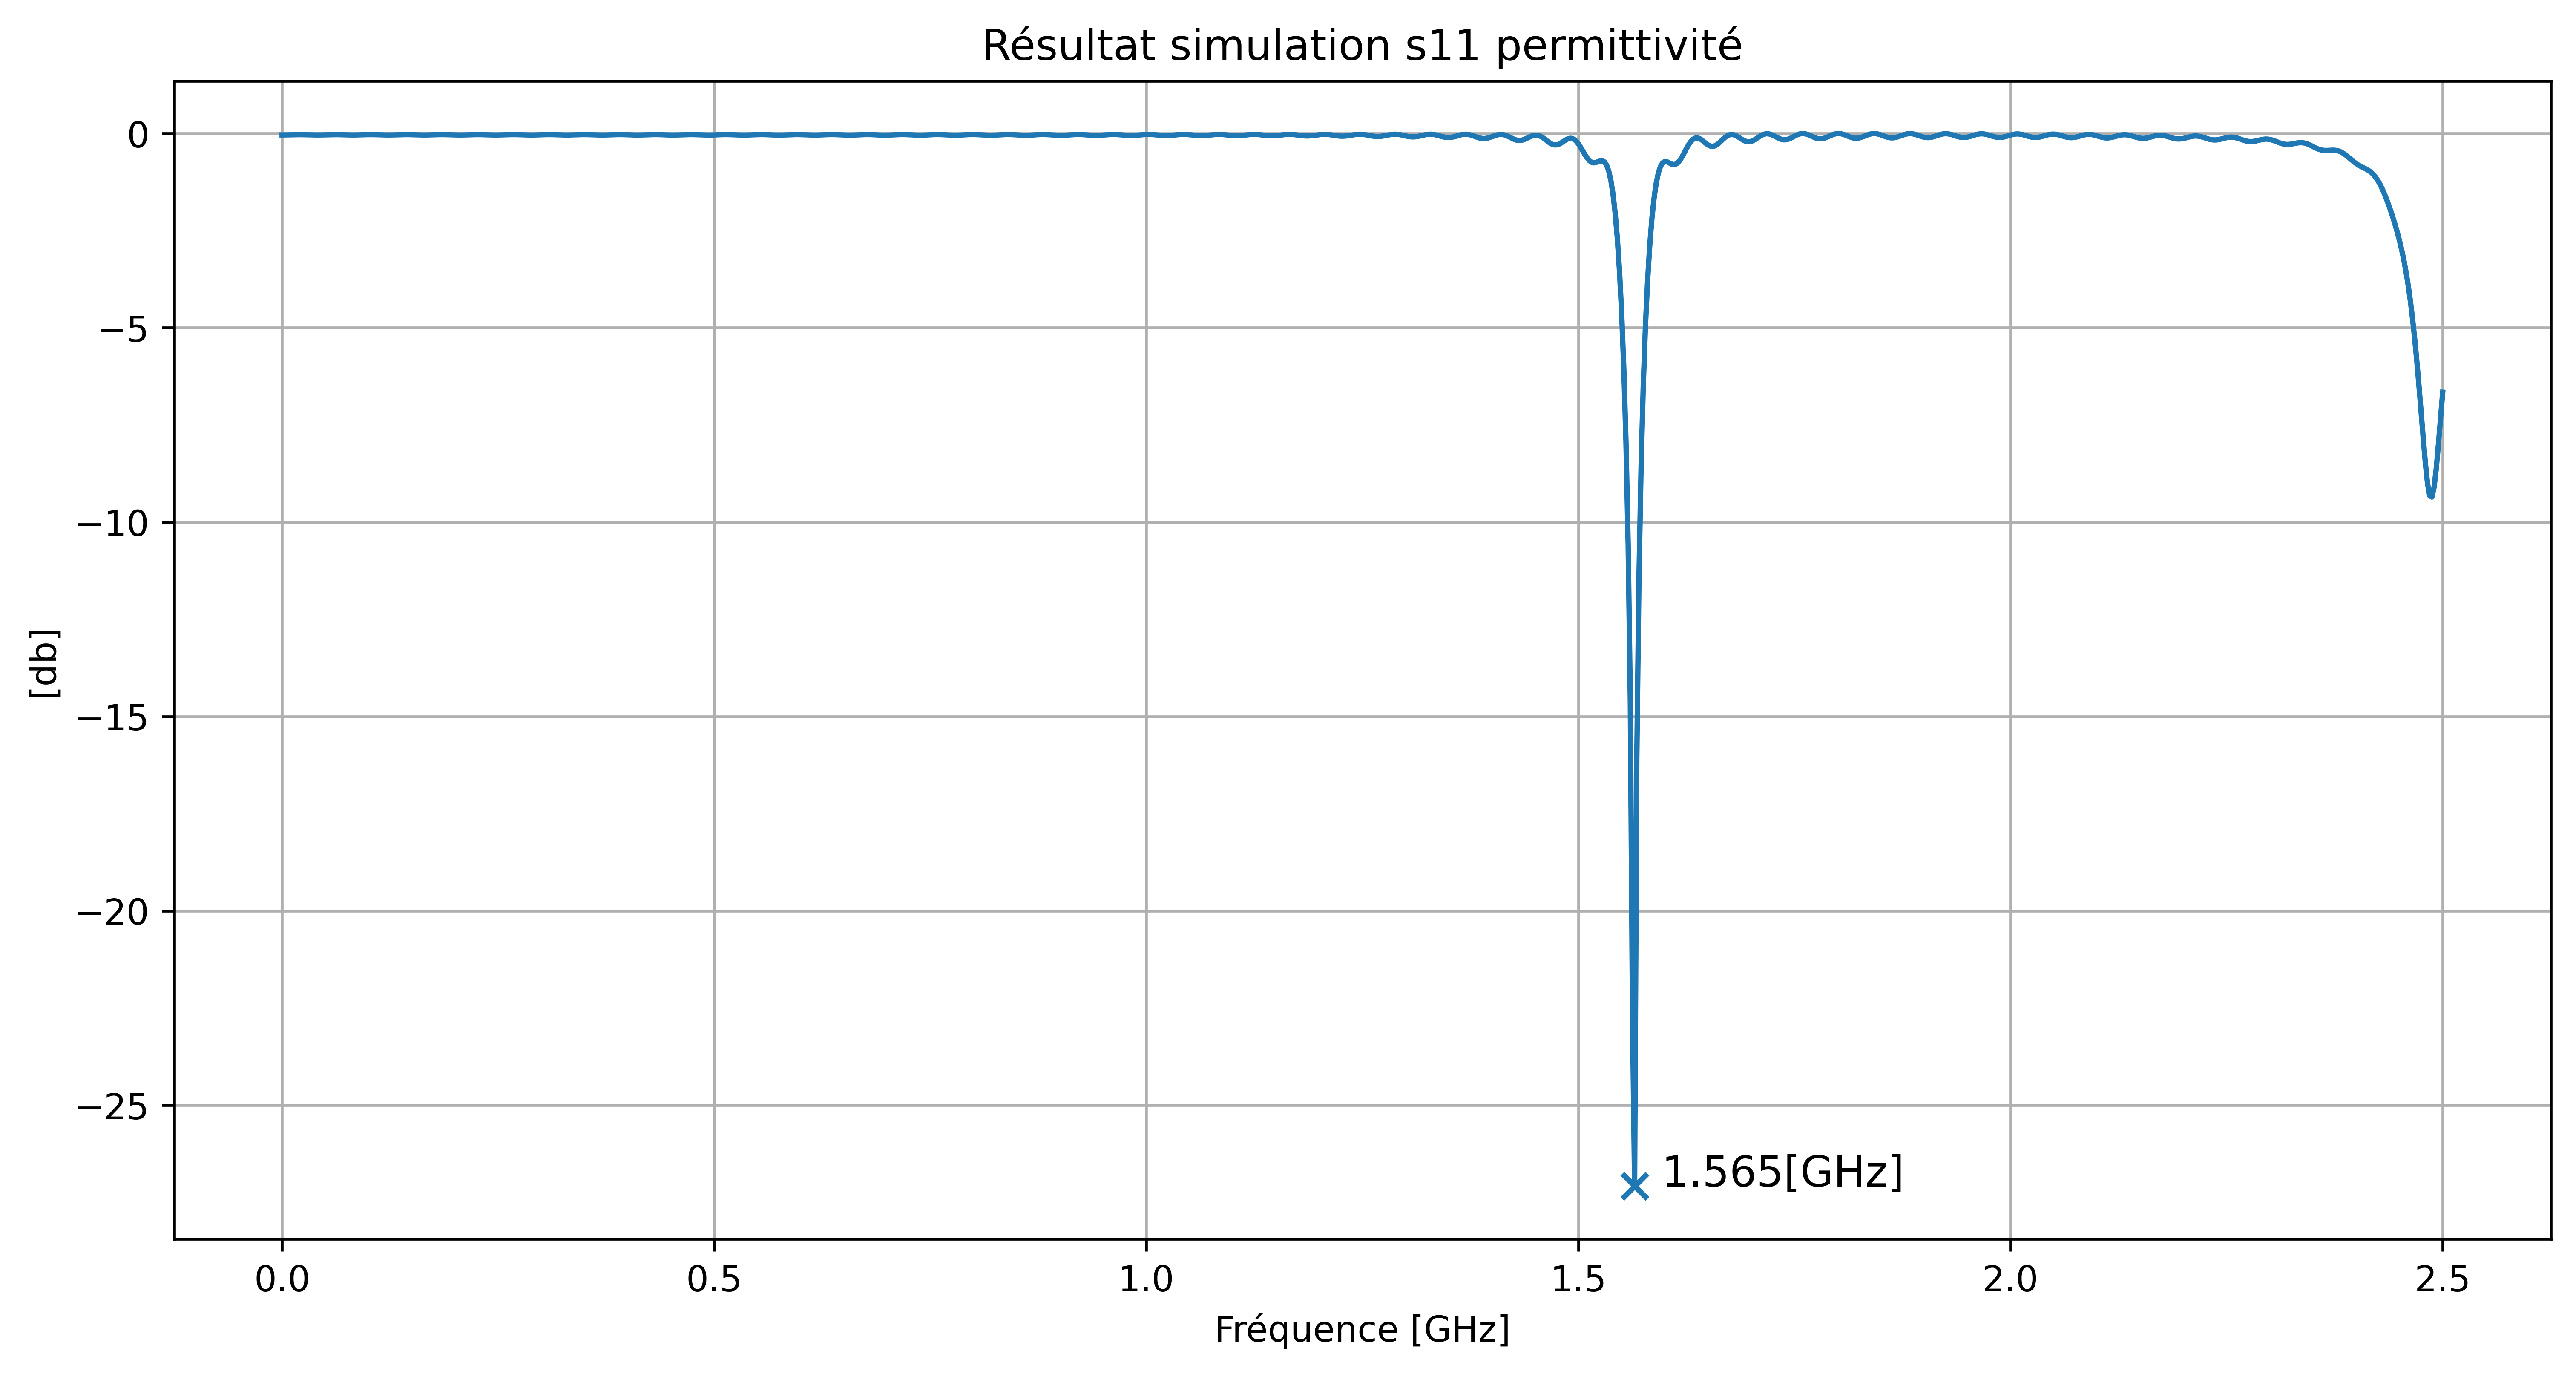

In [7]:
S11_perm = np.genfromtxt('mesuresPERM/s11_mesurePERM.txt',delimiter='\t',skip_header=1)
plt.figure(figsize=(12, 6), dpi=600)
plt.plot(S11_perm[:,0], S11_perm[:,1])
plt.scatter(*findParam(S11_perm, 1.565, 0.001).findMin(),s=50,marker='x')
plt.text(*findParam(S11_perm, 1.565, 0.001).findMin(),"  "+str(np.round(findParam(S11_perm, 1.565, 0.001).findMin()[0],3))+"[GHz]",fontsize=12)
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Résultat simulation s11 permittivité")
plt.savefig("../Figures/perm/mesure_perm.png")

findParam(S11_perm, 1.565, 0.001)